# MEAN FILTER : PL

In [5]:
from pynq import Overlay, Xlnk
import pynq_cv.overlays.xv2Filter2DDilate as xv2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from pynq import allocate


In [7]:
ol = Overlay("/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.bit")

Xlnk.set_allocator_library("/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.so")


In [74]:
og_image = cv2.imread('bellatrix.jpg', cv2.IMREAD_GRAYSCALE)

s = 0.2

image = cv2.resize(og_image, (0, 0), fx=s, fy=s, interpolation=cv2.INTER_AREA)

height, width = image.shape



In [75]:
xFimg = allocate(shape=(height, width), dtype=np.uint8)
xFout = allocate(shape=(height, width), dtype=np.uint8)

xFimg[:] = image[:]

xFimg.flush()



In [76]:
kernel = np.ones((3,3),np.float32)/9.0

In [77]:
start_time = time.time()

xv2.filter2D(xFimg, -1, kernel, dst=xFout, borderType=cv2.BORDER_CONSTANT)

end_time = time.time()
elapsed_time = (end_time - start_time) * 1000

In [78]:
print(f"Image size       : {width} x {height} pixels")
print(f"Kernel size      : {kernel_size[0]} x {kernel_size[1]}")

print(f"Box blur (mean filter) execution time: {elapsed_time:.3f} ms")

Image size       : 400 x 400 pixels
Kernel size      : 11 x 11
Box blur (mean filter) execution time: 2.797 ms


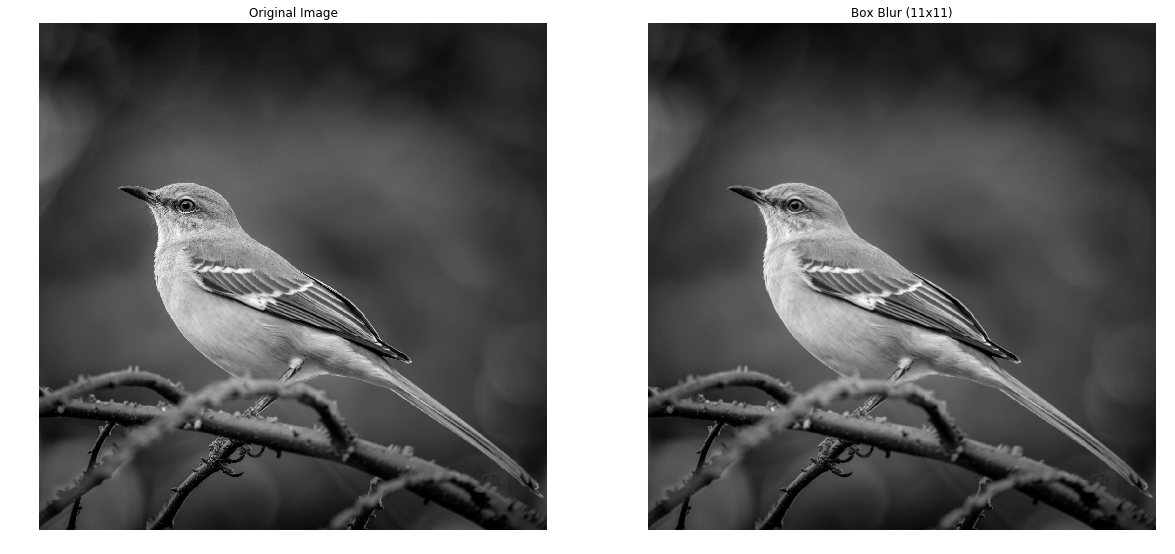

In [54]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(xFout, cmap='gray')
plt.title(f"Box Blur ({kernel_size[0]}x{kernel_size[1]})")
plt.axis('off')

plt.show()